<a href="https://colab.research.google.com/github/IshantWadhwa4/Finance-Analytics/blob/master/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Forecasting

## Table of Contents

1.   [Problem Statement](#Section1)
2.   [Basic EDA](#Section2)
3.   [Pre-Modeling](#Section3)
4.   [Modeling](#Section4)
5.   [Post Modeling](#Section5)
6.   [ML Interpretation | Explaninable AI](#Section6)
7.   [Model Deployment | MLOps](#Section7)
8.   [Create Dashbord](#Section8) 

## 1. Problem Statement

**<h4>Business Scenario:</h4>**

- A multinational retail corporation named **The Shopper's Depot** operates a chain of hypermarkets, discount department stores, and grocery stores all around the world.

- The company is planning to open some additional stores in different regions and the management wants to **predict** the **future sales** of these stores and the **factors affecting** the sales numbers.

- This will help them in allocating a **budget** to each store according to the amount of mechanical and human resources required in the stores and setting up the **supply chain** and **inventory** systems.

- One challenge of modeling retail data is the need to make decisions based on **limited history**.

- As a result, the company has assigned its Data Science division the task to make the **department-wide sales forecast** for each store.

- The **target feature** is the **Weekly_Sales** column which shows the **sales** for the given department in the given store for a particular week.

## 2.Data Collection

| Column | Description |
| :--:| :--: | 
| **Store** | The store number. |
| **Dept** | The department number. |
| **Date** | The week |
| **Weekly_Sales** | Sales for the given department in the given store. |
| **IsHoliday** | Whether the week is a special holiday week. |
| **Temperature** | Average temperature in the region. |
| **Fuel_Price** | Cost of fuel in the region. |
| **MarkDown1** | Anonymized data related to promotional markdowns that **The Shopper's Depot** is running. |
| **MarkDown2** | Anonymized data related to promotional markdown. |
| **MarkDown3** | Anonymized data related to promotional markdowns. |
| **MarkDown4** | Anonymized data related to promotional markdowns. |
| **MarkDown5** | Anonymized data related to promotional markdowns. |
| **CPI** | The consumer price index. |
| **Unemployment** | The unemployment rate. |
| **Type** | Type of the store. |
| **Size** | Size of the store. |

In [0]:
import pandas as pd
DataUrl = 'https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Data/weekly_sales_data.csv'
data = pd.read_csv(DataUrl)

In [3]:
data.shape

(421570, 16)

In [0]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [0]:

data.info()
# date datatype
#markdown1 to 5 has null values

In [0]:
data.describe()
# find relation b/w weekly sales and temp --> Graph 
# find relation b/w weekly sales and Fuel_Price --> Graph 

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [0]:
data.groupby('Store').count()['Dept']
# number of department in each store

In [0]:
# how many null and zeros value
def get_number_zeros_null(df):
  '''
       LIb : need pandas lib for this function.

       Input : Only required dataframe for which you want zeros and null for each column       
       Output: dataframe with number of zeros and null
  '''
  null_zero_dict={ }
  null_zero_dict['Number_of_nulls'] = df.isnull().sum()
  null_zero_dict['Number_of_zeros'] = (df==0).astype(int).sum()
  return pd.DataFrame(null_zero_dict).T

In [0]:
get_number_zeros_null(data)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Number_of_nulls,0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
Number_of_zeros,0,0,0,73,391909,0,0,0,207,67,0,0,0,0,0,0


In [0]:
# Tasks solution
# date datatype
# in first experiment i will replace null with zero

In [0]:
# date datatype
def convert_dateTime(df,column_list):
  for col in column_list:
    df[col] = pd.to_datetime(df[col])
  return df

data = convert_dateTime(data,['Date'])

In [5]:
# In first experiment i will replace null with zero
def replace_null_columns(df,list_columns):
  for col in list_columns:
      df[col].fillna(0,inplace=True)
  return df

replace_null_columns(data,['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


## 3. Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_numeric_data_columns(df):
  '''
      return list of all numeric data columns name
  '''
  return list(df._get_numeric_data().columns)

def get_catagorical_data_columns(df):
  '''
      return list of all catagoric data columns name
  '''
  return list(set(df.columns) - set(df._get_numeric_data().columns))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def draw_countPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_catagorical_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    if len(df[var_name].unique()) < 8:
      ax=fig.add_subplot(n_rows,n_cols,i+1)
      sns.countplot(x = var_name, data=df)
      ax.set_title(var_name)
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

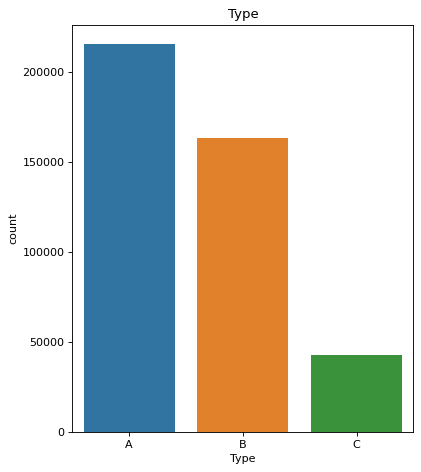

In [0]:
draw_countPlot_grid(data)
# alittle disbalance data in type c

In [0]:
from random import randint
def draw_distributionPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_numeric_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  colors = []
  for i in range(n_rows*n_cols):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
  for i, var_name in enumerate(list_columns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    sns.distplot(df[var_name],hist=True,axlabel=var_name,color=colors[i])
    ax.set_title(var_name)
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

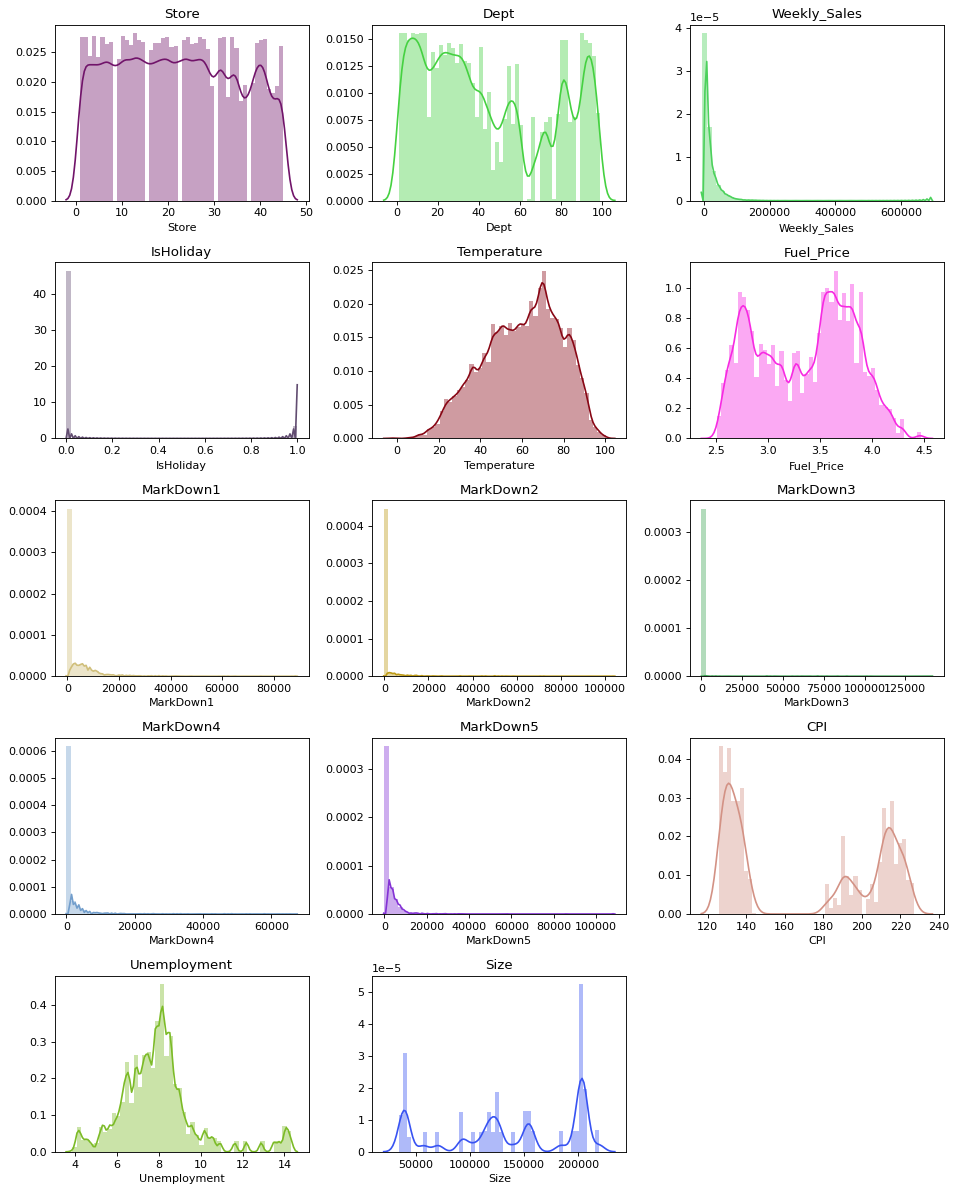

In [0]:
draw_distributionPlot_grid(data)
# weekly sales is right skew on few days the sale is very high may b holydays
# q: find relation b/w holiday and weekly sales
# q: on holiday which store has max sale in wich departament
# how temp/fuleprice affect the sales

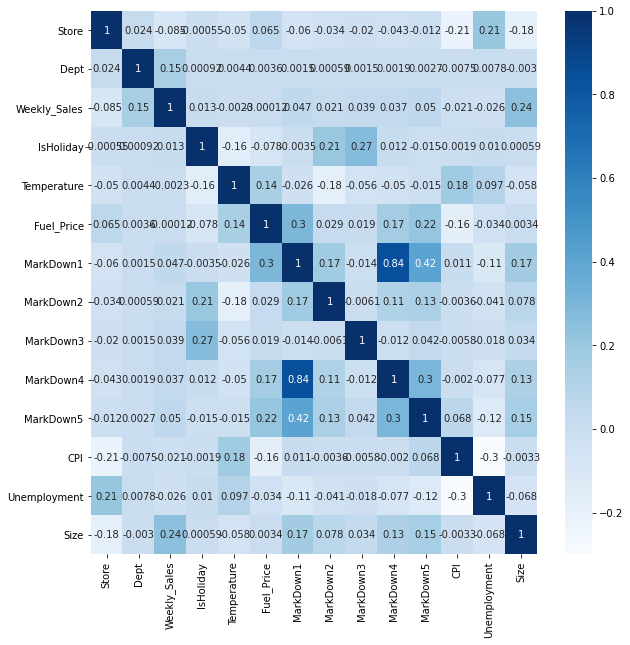

In [0]:
# relation b/w each
def heatmap_allcolumns(df):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(data=df.corr(),annot=True, cmap="Blues", ax=ax)

heatmap_allcolumns(data)

In [0]:
import numpy as np

def create_seaborn_heatmap_highcorelated(df,posThreshold,negThreshold):
  '''
      create Heatmap for highly co-related(given threshold) columns

      Input: dataframe, positive threshold, negitive threshold
      Plot: Heatmap
  '''
  df_corr = df.corr()
  tempdf = df_corr[(df_corr > posThreshold) | (df_corr < -negThreshold)]
  tempdf.replace(to_replace=1,value=np.nan,inplace=True)
  tempdf.dropna(axis=1,how='all',inplace=True)
  tempdf.dropna(axis=0,how='all',inplace=True)
  sns.heatmap(tempdf,annot=True, cmap="Blues")

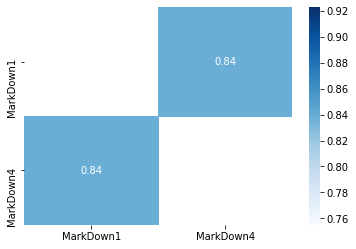

In [0]:
create_seaborn_heatmap_highcorelated(data,0.6,0.6)
# There is no good relation

In [0]:
# Feature engg.
data['Month'] = data['Date'].dt.month

In [0]:
#list of question for EDA
# q: find relation b/w holiday/Date and weekly sales
# q: on holiday which store has max sale in which departament
# q: how petrol price and weekly sales are related 
# q which store sell max with which department
# q: relation between temp and department and store
# q: relation b/w cpm size and unemployment

In [0]:
# Q :Is the Size of the Store related to the Type of the Store?
data_type = data[['Type','Size']].drop_duplicates()
data.groupby(['Type','Size']).count().index

Text(0.5, 1.0, 'Relationship Between the Size and Type of the Store')

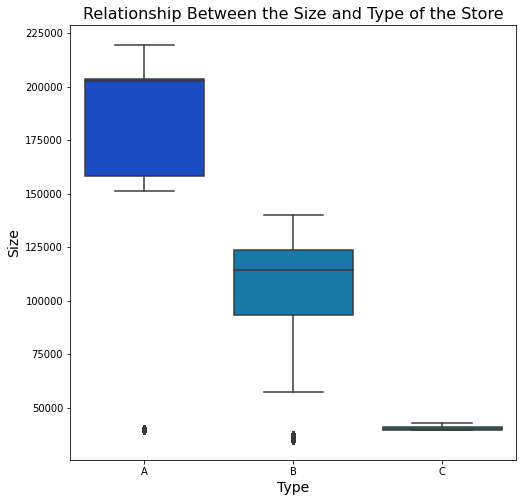

In [58]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x='Type', y='Size', palette='winter', width=0.8)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.title('Relationship Between the Size and Type of the Store', fontsize=16)

# Yes there is relation b/w size and type

In [0]:
# Does the Larger Sized Stores have Higher Weekly Sales?

In [63]:
data.groupby('Type')['Weekly_Sales'].sum()

Type
A    4.331015e+09
B    2.000701e+09
C    4.055035e+08
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Relationship Between the Weekly Sales and Type of the Store')

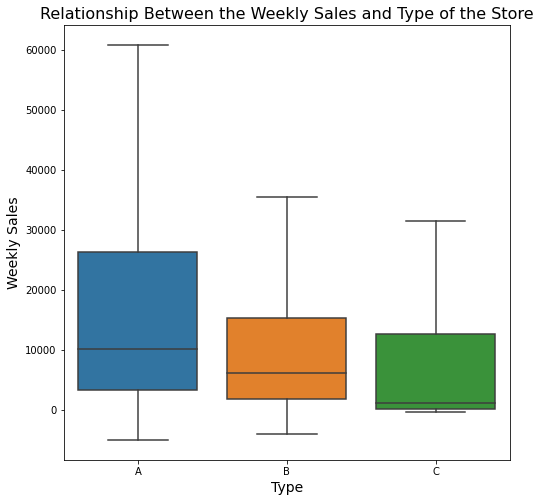

In [65]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x='Type', y='Weekly_Sales', width=0.8, showfliers=False)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Relationship Between the Weekly Sales and Type of the Store', fontsize=16)

Text(0.5, 1.0, 'Relationship Between the Weekly Sales and Type of the Store')

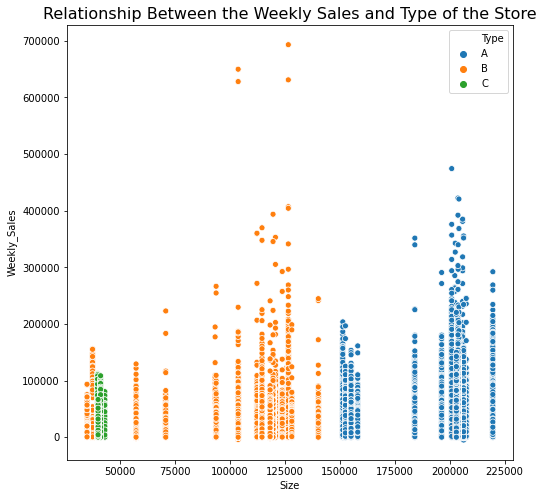

In [67]:
# Is there a Strong Positive Correlation between the Size and the Weekly Sales of a Store?
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Size',y='Weekly_Sales',data=data,hue='Type')
plt.title('Relationship Between the Weekly Sales ,Type of the Store and size', fontsize=16)

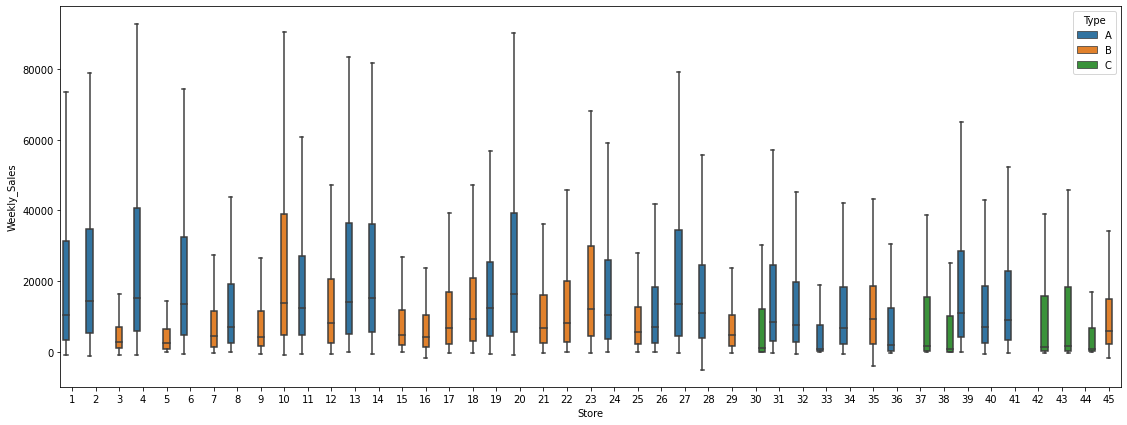

In [11]:
#How does each Store perform on the basis of Weekly Sales?
plt.figure(figsize=(19, 7))
sns.boxplot(x='Store',y='Weekly_Sales',data = data,hue='Type',showfliers=False)

In [0]:
#  Do the Holidays impact the Weekly Sales of the Stores?